In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Input,Flatten
from tensorflow.keras.models import Model

In [8]:
mnist = tf.keras.datasets.fashion_mnist

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0 
x_train.shape

(60000, 28, 28)

In [11]:
x_train = np.expand_dims(x_train,-1)
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train[0].shape

(28, 28, 1)

In [14]:
k = len(set(y_train))

i = Input(x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2327 - accuracy: 0.9121 - val_loss: 0.2884 - val_accuracy: 0.8958
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2129 - accuracy: 0.9192 - val_loss: 0.2865 - val_accuracy: 0.8992
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1984 - accuracy: 0.9243 - val_loss: 0.3163 - val_accuracy: 0.8960
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1847 - accuracy: 0.9301 - val_loss: 0.3006 - val_accuracy: 0.9013
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1731 - accuracy: 0.9343 - val_loss: 0.3154 - val_accuracy: 0.8990


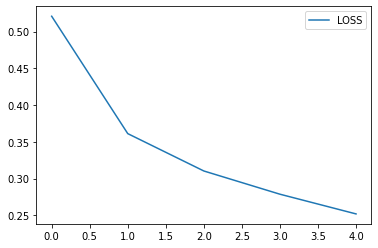

In [16]:
plt.plot(r.history['loss'],label='LOSS')
plt.legend()

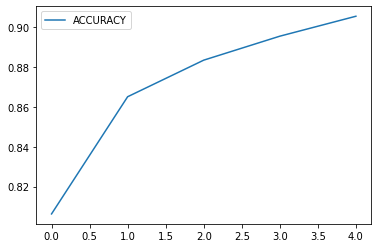

In [17]:
plt.plot(r.history['accuracy'],label='ACCURACY')
plt.legend()

In [18]:
acc = model.evaluate(x_test,y_test)
print('Accuracy: ',acc[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2984 - accuracy: 0.8890
Accuracy:  0.8889999985694885
